In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [36]:
iris = load_iris()

In [37]:
iris_df = pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [38]:
iris_df['species_id'] = iris.target

In [39]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species_id    150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [41]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0, 0.5, 'Petal Width')

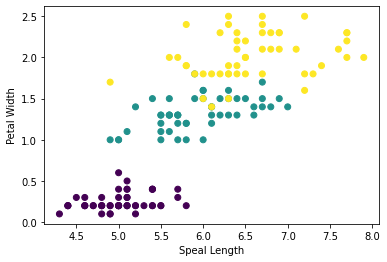

In [42]:
plt.scatter(iris_df['sepal_length'],iris_df['petal_width'],c=iris_df['species_id'])
plt.xlabel('Speal Length')
plt.ylabel('Petal Width')

In [43]:
species_map = {0:'setosa',1:'versicolor',2:'virginica'}

In [44]:
iris_df['species'] = iris_df['species_id'].map(species_map)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=21)

In [46]:
model = KMeans(n_clusters = 3)
model.fit(X_train,y_train)
model.inertia_

51.57472222222223

In [47]:
ks = range(1,6)
inertias=[]
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_train,y_train)
    inertias.append(model.inertia_)

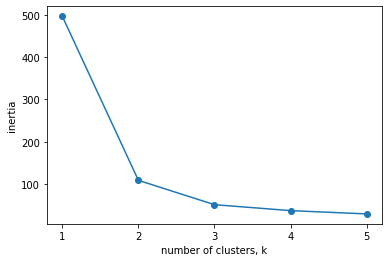

In [48]:
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [49]:
y_pred = model.predict(X_test)

In [50]:
cross_df = pd.DataFrame({'predicted_species':y_pred,'test_species':y_test})

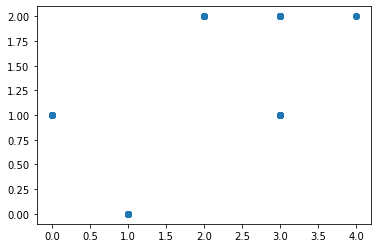

In [51]:
plt.scatter(y_pred,y_test)

In [52]:
cross_tab = pd.crosstab(cross_df['predicted_species'],cross_df['test_species'])

In [53]:
cross_tab

test_species,0,1,2
predicted_species,,,
0,0,6,0
1,14,0,0
2,0,0,5
3,0,10,8
4,0,0,2


In [54]:
species = iris_df['species_id']

In [55]:
samples = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]

In [56]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=1000)
transformed = model.fit_transform(samples)

C:\Users\Akhil_S_Bhat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [57]:
xs = transformed[:,0]
ys = transformed[:,1]

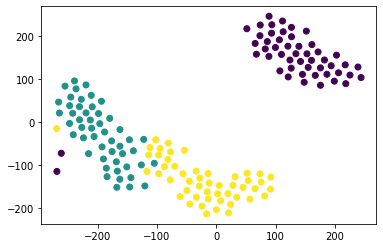

In [58]:
plt.scatter(xs,ys,c=species)

In [59]:
species = iris_df['species_id']

In [60]:
samples = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]

In [61]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)

PCA()

In [62]:
transformed = model.transform(samples)

In [63]:
transformed

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

In [64]:
model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [65]:
features = range(model.n_components_)

Text(0.5, 0, 'PCA Features')

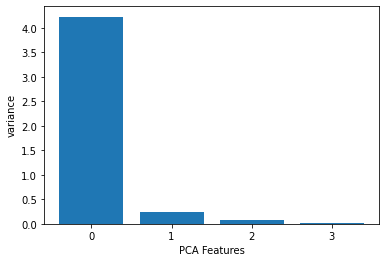

In [66]:
plt.bar(features,model.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA Features')

In [67]:
model = PCA(n_components=2)
model.fit(samples)
transformed = model.transform(samples)
print(transformed.shape)

(150, 2)


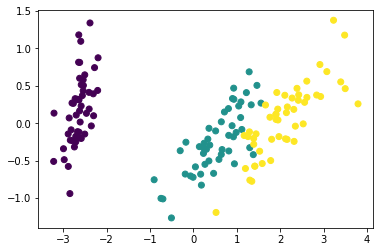

In [68]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=species)

## Using scipy implementation

In [69]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['species_id'] = iris.target
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=21)

<AxesSubplot:xlabel='sepal_length', ylabel='species_id'>

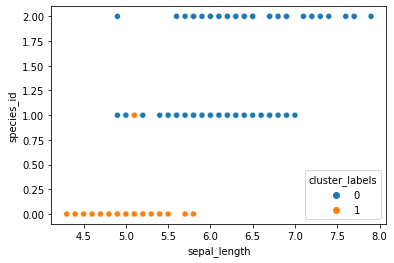

In [76]:
from scipy.cluster.vq import kmeans,vq
import seaborn as sns
centroids,_ = kmeans(iris_df,2)
iris_df['cluster_labels'], _ = vq(iris_df,centroids)
sns.scatterplot(x='sepal_length',y= 'species_id',hue='cluster_labels',data=iris_df)

<AxesSubplot:xlabel='sepal_width', ylabel='species_id'>

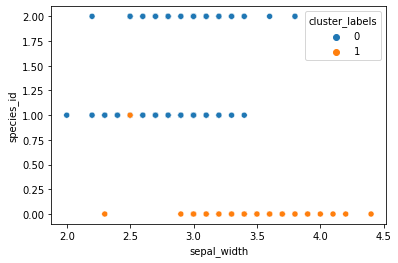

In [77]:
sns.scatterplot(x='sepal_width',y= 'species_id',hue='cluster_labels',data=iris_df)

<AxesSubplot:xlabel='petal_length', ylabel='species_id'>

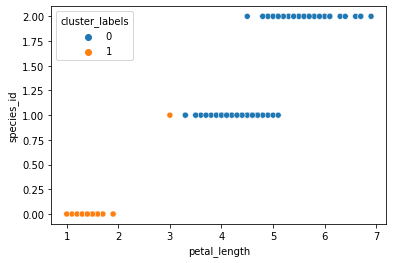

In [78]:
sns.scatterplot(x='petal_length',y= 'species_id',hue='cluster_labels',data=iris_df)

<AxesSubplot:xlabel='petal_width', ylabel='species_id'>

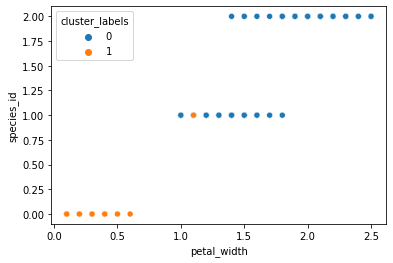

In [79]:
sns.scatterplot(x='petal_width',y= 'species_id',hue='cluster_labels',data=iris_df)